In [ ]:
#pip install xgboost

# BigMart Sales Prediction


### Life Cycle of Machine Learning Project

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

<div class="alert alert-block alert-info">

#### 1. Understanding the Problem Statement
#### 2. Data Collection
#### 3. Data Checks to perform
#### 4. Exploratory Data Analysis
#### 5. Data Preprocessing
#### 6. Model Training
#### 7. Choose best model



<div class="alert alert-block alert-info">
    
#### 1) Problem Statement 

<div class="alert alert-block alert-info">
    
    
#### Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client 
    
#### demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer

#### information and particular item details. By mining the data store from the data warehouse, more anomalies and common 

#### patterns can be discovered.

<div class="alert alert-block alert-info">

### 2) Data Collection
      
 
    
    
    
<div class="alert alert-block alert-info">

#### This data consists of 12 columns and 8523 rows
    
    
    
    
<div class="alert alert-block alert-success">
    
    
#### Data:    &nbsp; [Dataset Link](https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data) 
    
    
    
&nbsp;
&nbsp;
&nbsp;
    
   
    
    


## 2.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlin, Seaborn and Warnings Library

In [1]:
import catboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('C:\BigMartSales\Data\Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Shape of Data

In [3]:
df.shape

(8523, 12)

# 2.2 Dataset Information

# 3. Data Checks to Perform

## `1. Checking Missing values`

In [4]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

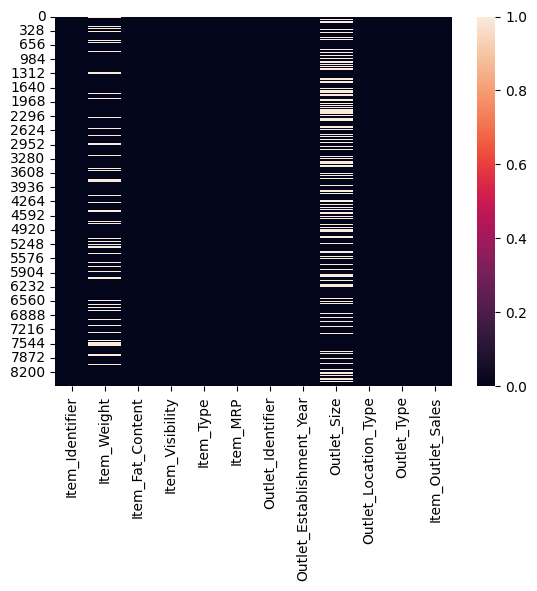

In [5]:
sns.heatmap(df.isnull())

### *`It is clear from the heat map that in our dataset values of Item_Weight and Outlet_Size is missing in order to solve this we will impute the following columns with mean and mode respectively.`*

In [6]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [7]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [8]:
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [9]:
missing_values = df['Outlet_Size'].isnull()
missing_values.sum()

2410

In [10]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

### Again checking the missing values

<Axes: >

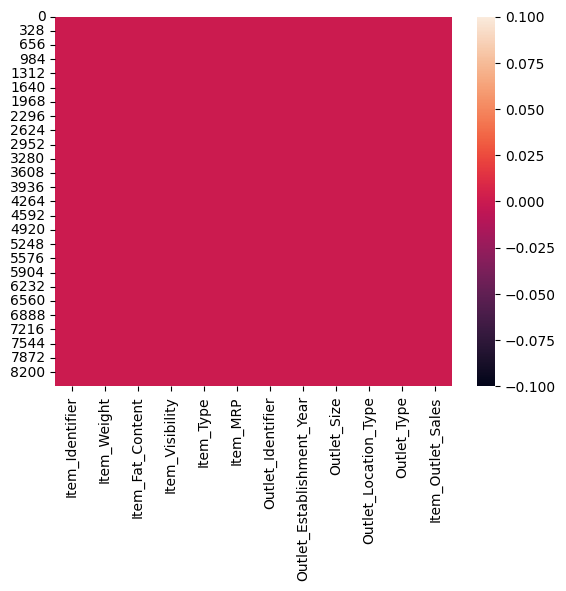

In [11]:
sns.heatmap(df.isnull())

### *`It is visible from the heatmap that now there are no missing values in the dataset.`*

# 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

0

### *`There are no duplicates values in the data set.`*

# 3.3 Check data types

In [13]:
# Check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# 3.5 Check statistics of dataset

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### *`Insight`*
#### 1. Maximum outlet sales of item is 13086.964800 and minimum is 2181.288914
#### 2. Minimum MRP of items is 31.290000 and maximum is 266.888400 and average is 140.992782

In [16]:
# df.drop(['Item_Identifier'],axis=1,inplace=True)

# sns.heatmap(df.corr(),annot=True)


ValueError: could not convert string to float: 'Low Fat'

## Exploring the data

In [18]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [19]:
r = []
for j in df.columns:
    if df[j].dtypes=='object':
        r.append(j)


In [20]:
for i in df[r]:
    print(">>",i,"-------------------------------------")
    
    print(df[i].unique())
    print("Total counts of",i,"is:",len(df[i].unique()),"\n")
    

>> Item_Fat_Content -------------------------------------
['Low Fat' 'Regular']
Total counts of Item_Fat_Content is: 2 

>> Item_Type -------------------------------------
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Total counts of Item_Type is: 16 

>> Outlet_Identifier -------------------------------------
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Total counts of Outlet_Identifier is: 10 

>> Outlet_Size -------------------------------------
['Medium' 'Small' 'High']
Total counts of Outlet_Size is: 3 

>> Outlet_Location_Type -------------------------------------
['Tier 1' 'Tier 3' 'Tier 2']
Total counts of Outlet_Location_Type is: 3 

>> Outlet_Type -------------------------------------
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
T

## `2. Data Visualization`

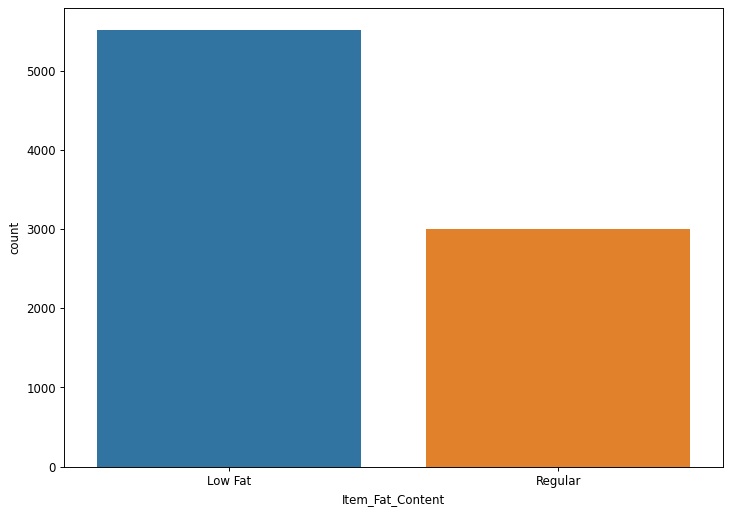

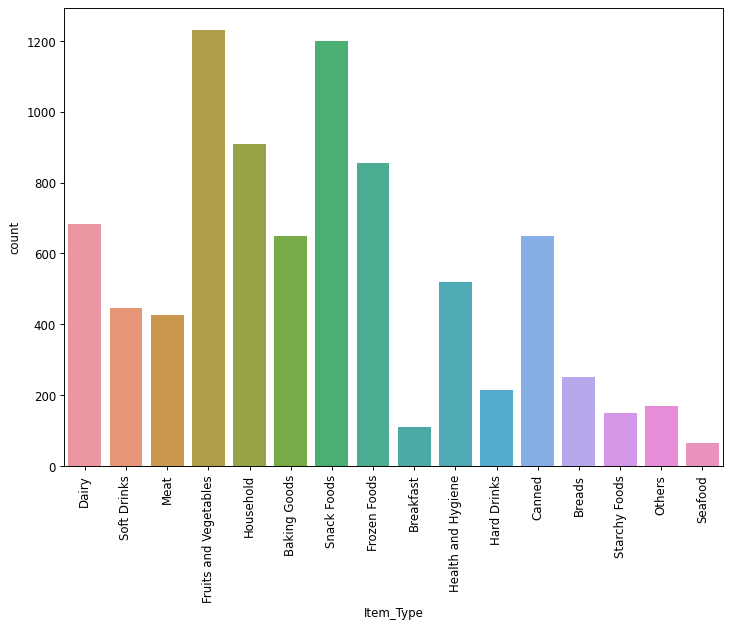

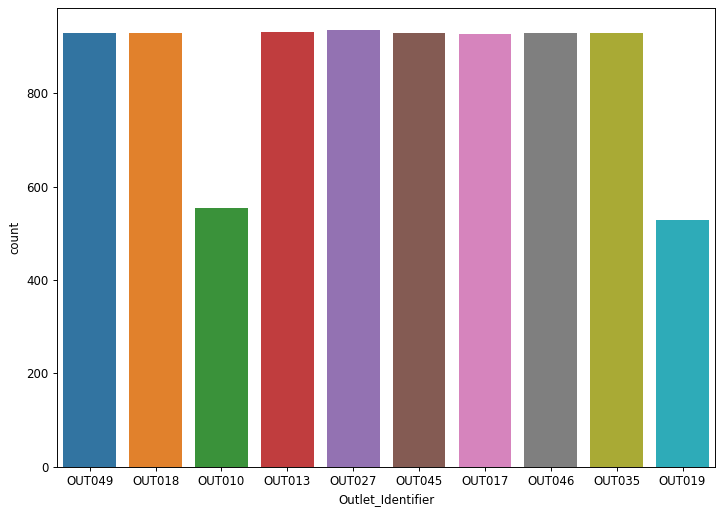

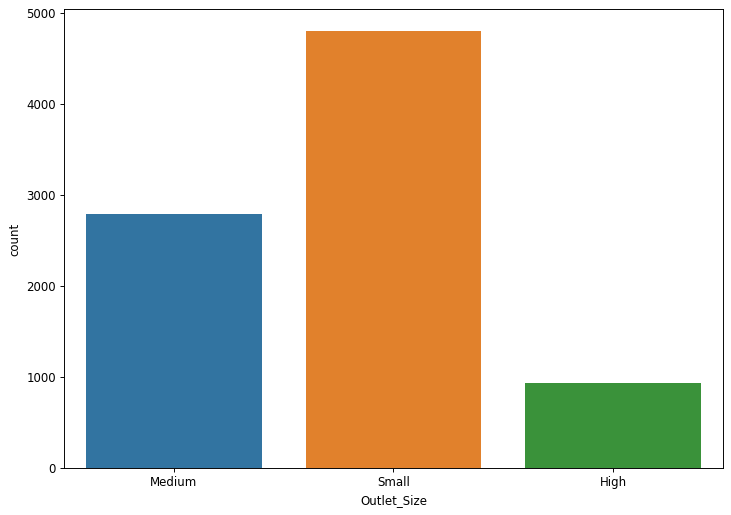

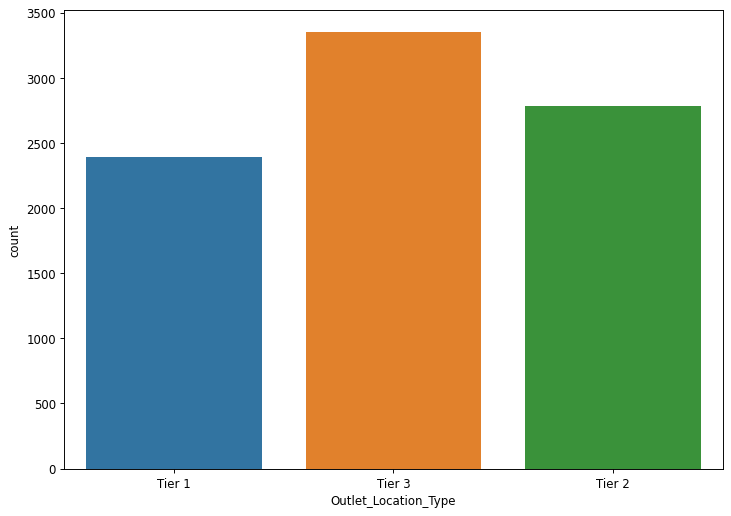

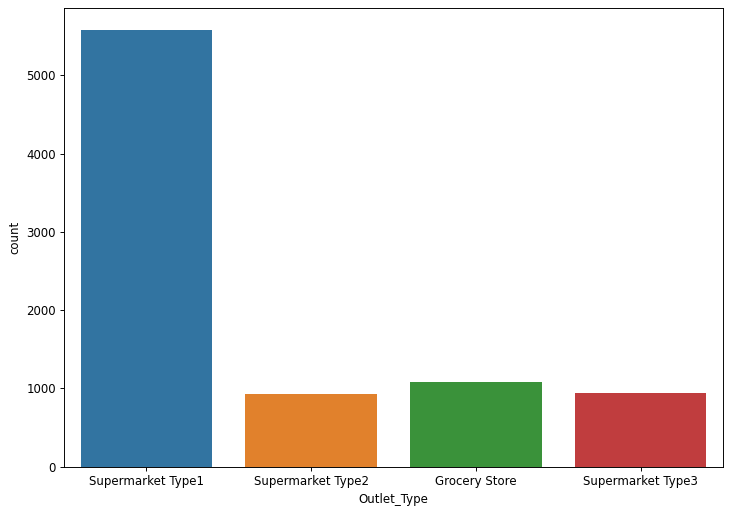

In [21]:
for i in df[r]:
    plt.figure(figsize=(10,7),dpi=85)
    if i == 'Item_Type':
        plt.xticks(rotation=90)
    sns.countplot(data=df,x=i)
    plt.show()

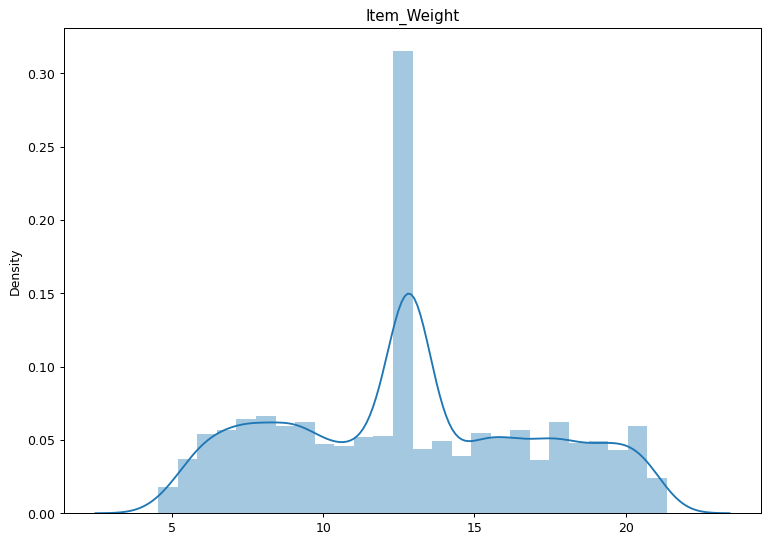

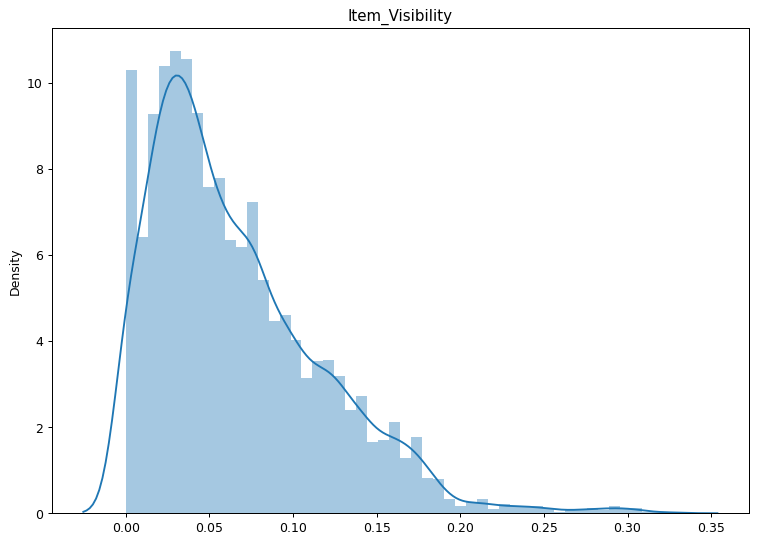

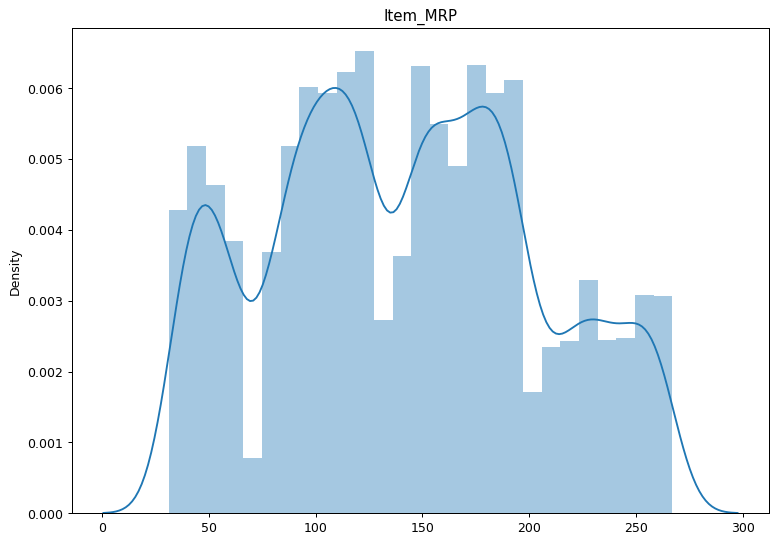

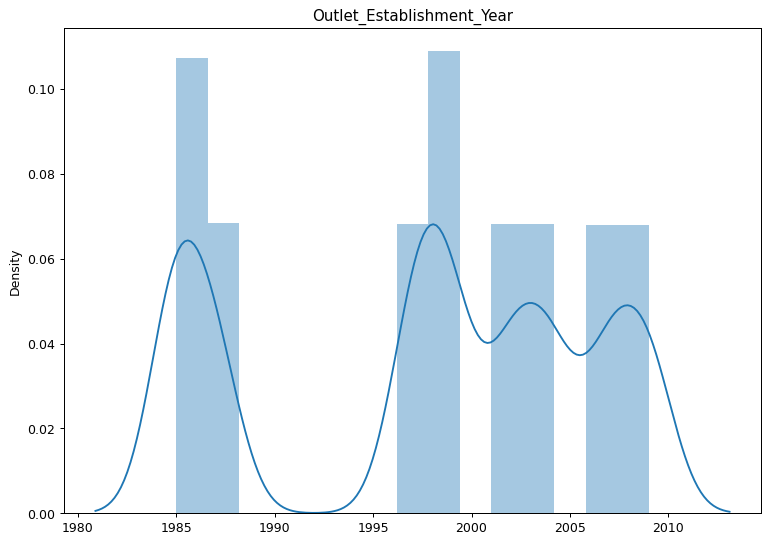

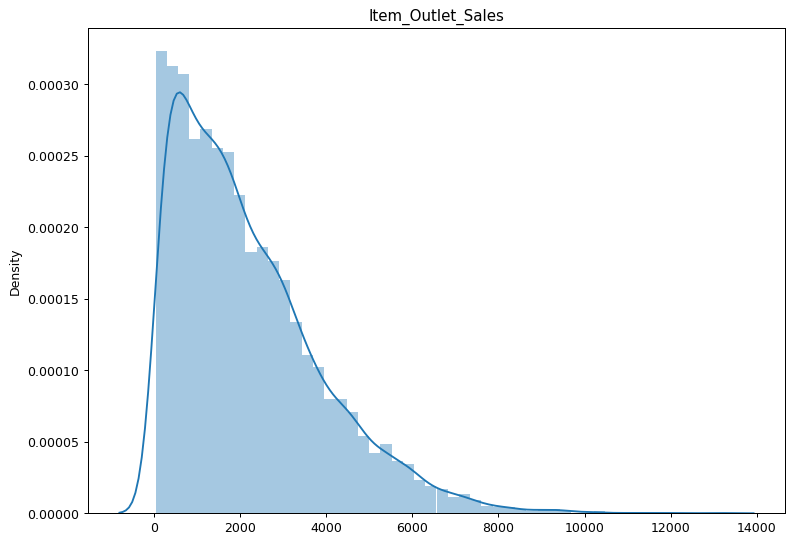

In [22]:
for col in df.columns:
    if df[col].dtypes=='int64' or df[col].dtypes=='float64':
        plt.figure(figsize=(10,7),dpi=90)
        sns.distplot(x=df[col],kde=True)
        plt.title(col)
        plt.show()

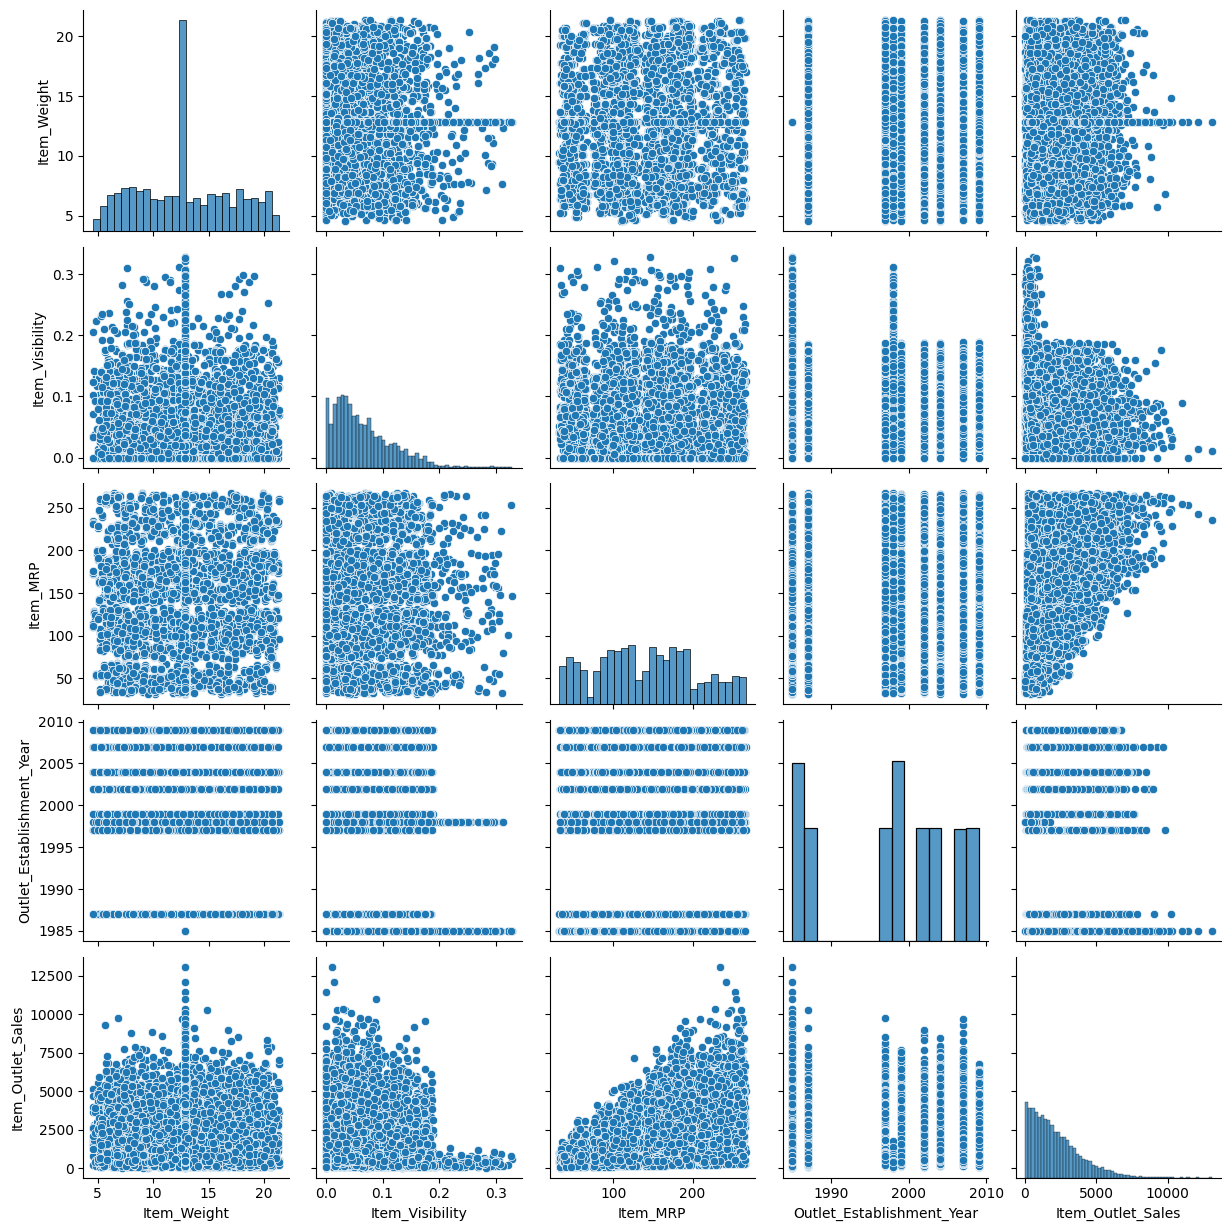

In [23]:
sns.pairplot(df)